<a href="https://colab.research.google.com/github/indrasz/Strategi-Algoritma/blob/main/genom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

def get_ensembl_info(ensembl_id, ensembl_type):
    # Define the correct endpoint based on the type
    base_url = "https://rest.ensembl.org"
    endpoints = {
        "gene": f"{base_url}/lookup/id/{ensembl_id}?content-type=application/json",
        "transcript": f"{base_url}/lookup/id/{ensembl_id}?content-type=application/json",
        "protein": f"{base_url}/lookup/id/{ensembl_id}?content-type=application/json"
    }

    # Get the appropriate URL
    url = endpoints.get(ensembl_type)

    if url is None:
        return None

    # Make the GET request to Ensembl REST API
    response = requests.get(url)

    # Check the response status
    if response.status_code == 200:
        return response.json()
    else:
        return None

def divide_and_conquer(ensembl_ids):
    results = {}

    # Divide: Process each Ensembl ID
    for ensembl_type, ensembl_id in ensembl_ids.items():
        # Conquer: Fetch information from Ensembl
        info = get_ensembl_info(ensembl_id, ensembl_type)
        if info:
            results[ensembl_type] = info
        else:
            results[ensembl_type] = f"No data found for ID: {ensembl_id}"

    # Combine: Return the collected results
    return results

# Ensembl IDs provided
ensembl_ids = {
    "gene": "ENSG00000186092",
    "transcript": "ENST00000641515",
    "protein": "ENSP00000493376"
}

# Execute the divide and conquer function
result = divide_and_conquer(ensembl_ids)

# Print the results
for key, value in result.items():
    if key == "gene":
        print("Gene Product Information:")
        print(f"Product Name: {value.get('display_name')}")
        print(f"Description: {value.get('description')}")
        print(f"Biotype: {value.get('biotype')}")
        print("\nRelated Gene Products:")
        related_genes = value.get('homologues')
        if related_genes:
            for gene in related_genes:
                print(f"- {gene.get('display_id')} ({gene.get('species')})")
        else:
            print("No related gene products found.")
        print("\n")

    elif key == "transcript":
        print("Transcript:")
        print(f"Transcript ID: {value.get('id')}")
        print("\nExons and Introns:")
        transcript_exons = value.get('Exon')
        if transcript_exons:
            for exon in transcript_exons:
                print(f"- Exon {exon.get('rank')} ({exon.get('start')}-{exon.get('end')})")
                print(f"  - Sequence: {exon.get('sequence')}")
        else:
            print("No exon and intron information found.")

        print("\nTranscript Details:")
        print(f"Chromosome Location: {value.get('seq_region_name')}:{value.get('start')}-{value.get('end')} ({value.get('strand')})")
        print(f"Biotype: {value.get('biotype')}")
        print("\n")

    elif key == "protein":
        print("Protein:")
        print(f"Protein ID: {value.get('id')}")
        print("\nProtein Structure Information:")
        print(f"Domains: {value.get('domains')}")
        print(f"Motifs: {value.get('motifs')}")
        print(f"Secondary Structures: {value.get('secondary_structure')}")

        print("\nProtein Sequence:")
        print(value.get('seq'))

        print("\nProtein Function and Interactions:")
        print(f"Function: {value.get('function')}")
        print(f"Interactions: {value.get('interactions')}")
        print(f"Biological Pathways: {value.get('pathways')}")
        print("\n")

Gene Product Information:
Product Name: OR4F5
Description: olfactory receptor family 4 subfamily F member 5 [Source:HGNC Symbol;Acc:HGNC:14825]
Biotype: protein_coding

Related Gene Products:
No related gene products found.


Transcript:
Transcript ID: ENST00000641515

Exons and Introns:
No exon and intron information found.

Transcript Details:
Chromosome Location: 1:65419-71585 (1)
Biotype: protein_coding


Protein:
Protein ID: ENSP00000493376

Protein Structure Information:
Domains: None
Motifs: None
Secondary Structures: None

Protein Sequence:
None

Protein Function and Interactions:
Function: None
Interactions: None
Biological Pathways: None




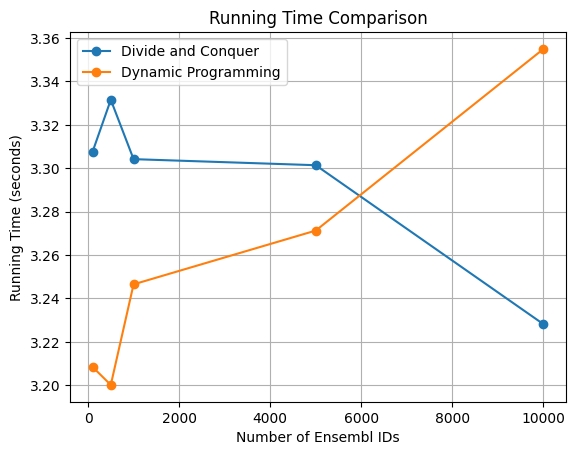

In [ ]:
import requests
import time
import matplotlib.pyplot as plt

# Function to get Ensembl information
def get_ensembl_info(ensembl_id, ensembl_type):
    base_url = "https://rest.ensembl.org"
    endpoints = {
        "gene": f"{base_url}/lookup/id/{ensembl_id}?content-type=application/json",
        "transcript": f"{base_url}/lookup/id/{ensembl_id}?content-type=application/json",
        "protein": f"{base_url}/lookup/id/{ensembl_id}?content-type=application/json"
    }

    url = endpoints.get(ensembl_type)
    if url is None:
        return None

    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Divide and conquer approach
def divide_and_conquer(ensembl_ids):
    results = {}
    for ensembl_type, ensembl_id in ensembl_ids.items():
        info = get_ensembl_info(ensembl_id, ensembl_type)
        if info:
            results[ensembl_type] = info
        else:
            results[ensembl_type] = f"No data found for ID: {ensembl_id}"
    return results

# Dynamic programming approach
def dynamic_programming(ensembl_ids):
    results = {}
    cache = {}
    for ensembl_type, ensembl_id in ensembl_ids.items():
        if ensembl_id in cache:
            results[ensembl_type] = cache[ensembl_id]
        else:
            info = get_ensembl_info(ensembl_id, ensembl_type)
            if info:
                cache[ensembl_id] = info
                results[ensembl_type] = info
            else:
                results[ensembl_type] = f"No data found for ID: {ensembl_id}"
    return results

# Ensembl IDs provided
ensembl_ids = {
    "gene": "ENSG00000186092",
    "transcript": "ENST00000641515",
    "protein": "ENSP00000493376"
}

# Benchmarking and comparison
divide_times = []
dynamic_times = []
sizes = [100, 500, 1000, 5000, 10000]  # Different input sizes

for size in sizes:
    test_ids = {k: ensembl_ids[k] for k in list(ensembl_ids.keys()) * size}

    # Time divide and conquer
    start_time = time.time()
    divide_and_conquer(test_ids)
    end_time = time.time()
    divide_times.append(end_time - start_time)

    # Time dynamic programming
    start_time = time.time()
    dynamic_programming(test_ids)
    end_time = time.time()
    dynamic_times.append(end_time - start_time)

# Plotting the results
plt.plot(sizes, divide_times, label='Divide and Conquer', marker='o')
plt.plot(sizes, dynamic_times, label='Dynamic Programming', marker='o')
plt.xlabel('Number of Ensembl IDs')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time Comparison')
plt.legend()
plt.grid(True)
plt.show()

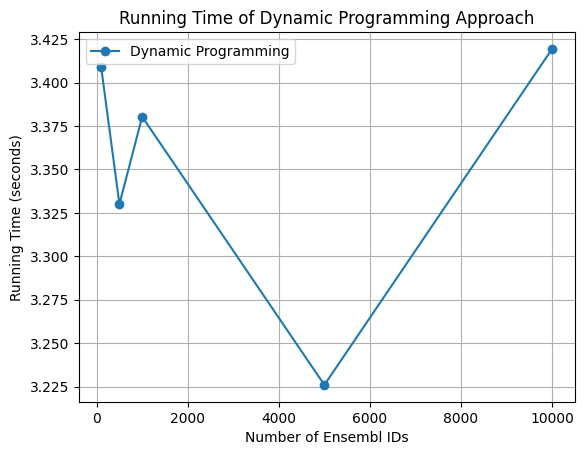

In [ ]:
import requests
import time
import matplotlib.pyplot as plt

# Function to get Ensembl information
def get_ensembl_info(ensembl_id, ensembl_type):
    base_url = "https://rest.ensembl.org"
    endpoints = {
        "gene": f"{base_url}/lookup/id/{ensembl_id}?content-type=application/json",
        "transcript": f"{base_url}/lookup/id/{ensembl_id}?content-type=application/json",
        "protein": f"{base_url}/lookup/id/{ensembl_id}?content-type=application/json"
    }

    url = endpoints.get(ensembl_type)
    if url is None:
        return None

    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Dynamic programming approach
def dynamic_programming(ensembl_ids):
    results = {}
    cache = {}
    for ensembl_type, ensembl_id in ensembl_ids.items():
        if ensembl_id in cache:
            results[ensembl_type] = cache[ensembl_id]
        else:
            info = get_ensembl_info(ensembl_id, ensembl_type)
            if info:
                cache[ensembl_id] = info
                results[ensembl_type] = info
            else:
                results[ensembl_type] = f"No data found for ID: {ensembl_id}"
    return results

# Ensembl IDs provided
ensembl_ids = {
    "gene": "ENSG00000186092",
    "transcript": "ENST00000641515",
    "protein": "ENSP00000493376"
}

# Benchmarking dynamic programming approach
dynamic_times = []
sizes = [100, 500, 1000, 5000, 10000]  # Different input sizes

for size in sizes:
    test_ids = {k: ensembl_ids[k] for k in list(ensembl_ids.keys()) * size}

    # Time dynamic programming
    start_time = time.time()
    dynamic_programming(test_ids)
    end_time = time.time()
    dynamic_times.append(end_time - start_time)

# Plotting the results
plt.plot(sizes, dynamic_times, label='Dynamic Programming', marker='o')
plt.xlabel('Number of Ensembl IDs')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time of Dynamic Programming Approach')
plt.legend()
plt.grid(True)
plt.show()

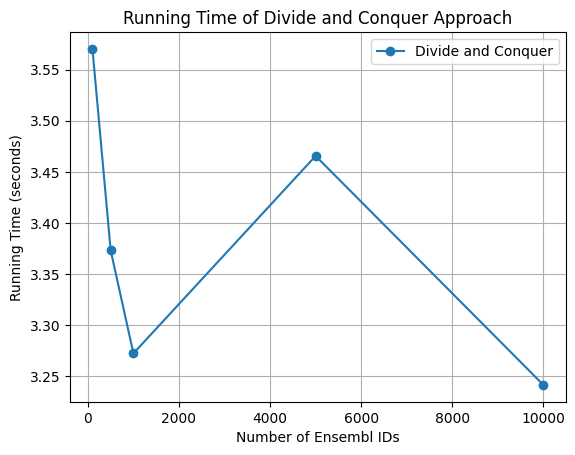

In [ ]:
import requests
import time
import matplotlib.pyplot as plt

# Function to get Ensembl information
def get_ensembl_info(ensembl_id, ensembl_type):
    base_url = "https://rest.ensembl.org"
    endpoints = {
        "gene": f"{base_url}/lookup/id/{ensembl_id}?content-type=application/json",
        "transcript": f"{base_url}/lookup/id/{ensembl_id}?content-type=application/json",
        "protein": f"{base_url}/lookup/id/{ensembl_id}?content-type=application/json"
    }

    url = endpoints.get(ensembl_type)
    if url is None:
        return None

    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Divide and conquer approach
def divide_and_conquer(ensembl_ids):
    results = {}
    for ensembl_type, ensembl_id in ensembl_ids.items():
        info = get_ensembl_info(ensembl_id, ensembl_type)
        if info:
            results[ensembl_type] = info
        else:
            results[ensembl_type] = f"No data found for ID: {ensembl_id}"
    return results

# Ensembl IDs provided
ensembl_ids = {
    "gene": "ENSG00000186092",
    "transcript": "ENST00000641515",
    "protein": "ENSP00000493376"
}

# Benchmarking divide and conquer approach
divide_times = []
sizes = [100, 500, 1000, 5000, 10000]  # Different input sizes

for size in sizes:
    test_ids = {k: ensembl_ids[k] for k in list(ensembl_ids.keys()) * size}

    # Time divide and conquer
    start_time = time.time()
    divide_and_conquer(test_ids)
    end_time = time.time()
    divide_times.append(end_time - start_time)

# Plotting the results
plt.plot(sizes, divide_times, label='Divide and Conquer', marker='o')
plt.xlabel('Number of Ensembl IDs')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time of Divide and Conquer Approach')
plt.legend()
plt.grid(True)
plt.show()
